In [1]:
import sys
sys.path.append("./keras/classification/")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
from keras.preprocessing.image import ImageDataGenerator
from Models_MNV2 import model_version_mb2
from log_visualization_tool import visual_train
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.
/home/zhangyouan/anaconda3/envs/IMX681TF1_13/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhangyouan/anaconda3/envs/IMX681TF1_13/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhangyouan/anaconda3/envs/IMX681TF1_13/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

ImportError: cannot import name 'Activation'

In [3]:

def cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen", 
                    epoch=300, 
                    save_model_name = 'pc_book_phone_0926_lower_train.h5',
                    model_summary="True",
                    weights = None):
    
    model = model_version_mb2()
    if weights is not None:
        model.load_weights(weights)
        
    test_data_path = data_path + "val"
    train_data_path = data_path + "train"
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    training_datagen = ImageDataGenerator(rescale=1. / 255,
                                          rotation_range=40, # 旋转范围
                                          width_shift_range=0.2, # 宽平移
                                          height_shift_range=0.2,# 高平移
                                          shear_range=0.2, # 剪切
                                          zoom_range=0.2, # 缩放
                                          horizontal_flip=True,
                                          fill_mode='nearest')
    
    training_generator = training_datagen.flow_from_directory(train_data_path,
                                                              target_size=(120, 160),
                                                              color_mode="grayscale",
                                                              class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
    print(validation_generator.class_indices)

    # 使用 ReduceLROnPlateau 回调函数
    adam = Adam(lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #======== 模型训练 =========
    history = model.fit(
        training_generator,
        epochs = epoch,
        validation_data = validation_generator,
        callbacks=[reduce_lr, early_stopping]
    )

    model.save(save_model_name) # model 保存

    return history

Found 5545 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


{'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}
Epoch 1/50
174/174 [==============================] - 95s 531ms/step - loss: 0.4072 - accuracy: 0.7623 - val_loss: 2.1933 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
174/174 [==============================] - 92s 527ms/step - loss: 0.2208 - accuracy: 0.8851 - val_loss: 2.5938 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
174/174 [==============================] - 92s 529ms/step - loss: 0.1728 - accuracy: 0.9107 - val_loss: 1.4983 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 4/50
174/174 [==============================] - 92s 529ms/step - loss: 0.1425 - accuracy: 0.9289 - val_loss: 0.4192 - val_accuracy: 0.7367 - lr: 0.0010
Epoch 5/50
174/174 [==============================] - 92s 529ms/step - loss: 0.1301 - accuracy: 0.9313 - val_loss: 1.9535 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 6/50
174/174 [==============================] - 92s 529ms/step - loss: 0.1139 - accuracy: 0.9421 - val_loss: 0.1194 - val_accuracy: 0.9317 - lr: 0.0010
Epoch 7

/home/zhangyouan/anaconda3/envs/stc/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


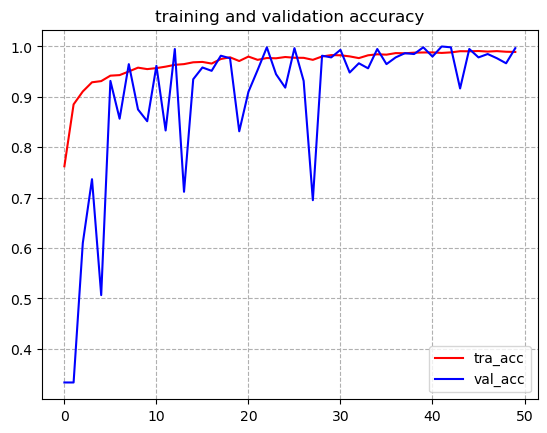

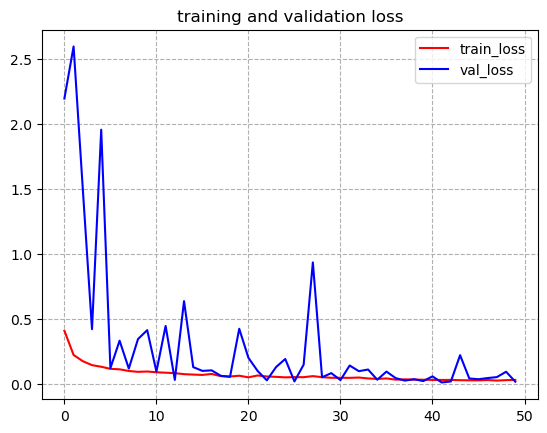

In [4]:
if __name__ == "__main__":
    history = cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/", 
                              epoch=50, 
                              save_model_name = './trained_model/pc_book_phone_0926_lower_train_trainmore.h5' )
    visual_train(history)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/"
test_data_path = data_path + "val"
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
print(validation_generator.class_indices)

Found 600 images belonging to 3 classes.
{'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}


In [6]:
import os 
import tensorflow as tf
import numpy as np
print("Tensorflow version:", tf.__version__)
from PIL import Image

# 制作量化数据集
path = r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/train/"
list_dir = os.listdir(path)

# labels = {"paper":0, "rock":1, "scissors":2}
labels = {'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}

test_images = []
test_images_link = []
test_labels = []
for i in list_dir:
    path1 = path + i + "/"
    list_label = os.listdir(path1)
    # print(list_label)
    for j in list_label:
        path2 = path1 + j
        tmp = [0, 0, 0]
        tmp[labels[i]]=1
        test_labels.append(tmp)
        test_images_link.append(path2)
        test_images_tmp = Image.open(path2)
        test_images_g = test_images_tmp.convert('L')
        test_images_g_resize = test_images_g.resize((160, 120), Image.ANTIALIAS) # (width, height)
        test_images.append(np.array(test_images_g_resize))

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = np.expand_dims(test_images, axis=-1)
test_images = test_images.astype(np.float32) # / 255.0
test_images = test_images / 255.0  # 将数值范围压缩到0~1之间；
# test_images = test_images/127.5-1

model = tf.keras.models.load_model(r'./trained_model/pc_book_phone_0926_lower_train_trainmore.h5')
# model.summary()
scores = model.evaluate(test_images, test_labels, verbose=0)
print("模型准确度：",scores[1])

Tensorflow version: 2.13.0


/tmp/ipykernel_8811/1928200957.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  test_images_g_resize = test_images_g.resize((160, 120), Image.ANTIALIAS) # (width, height)


模型准确度： 0.9953110814094543
